# Cavity-modified band structure using QEDFT electron-photon exchange functional 

This tutorial focuses on how to run the cavity-modified band structure of a two-dimensional material, black phosphorene, using quantum electrodynamical density functional theory (QEDFT) with the electron-photon exchange functional within the local density approximation (LDA), denoted as pxLDA below. The electron-photon exchange functional can be directly combined with the electron-electron exchange-correlation functional, assuming the correlation effect from the electron-photon interaction is neglected. The computational cost of using the pxLDA functional is as cheap as the standard density functional theory (DFT) calculations. 

## Overview of the electron-photon exchange functional within LDA approximation for QEDFT


The Kohn-Sham Hamiltonian $\hat{H}_{\rm{KS}}$ for the strong light-matter coupling system is defined as (in the Hartree atomic unit)
$$
\hat{H}_{\rm{KS}} = -\frac{1}{2}\nabla^{2} 
+ v_{\rm{ex}}(\mathbf{r}) 
+ v_{\rm{H}}(\mathbf{r})
+ v_{\rm{xc}}(\mathbf{r})
+ v_{\rm{pxc}}(\mathbf{r}),
$$
where $v_{\rm{ex}}(\mathbf{r})$ is the external potential (e.g., from the nuclei), $v_{\rm{H}}(\mathbf{r})$ the Hartree potential, $v_{\rm{xc}}(\mathbf{r})$ the (longitudinal) electron-electron exchange-correlation potential,  and $v_{\rm{pxc}}(\mathbf{r})$ the (transverse) electron-photon exchange-correlation potential. 

The electron-electron exchange-correlation potential can be modelled using those (such as LDA and PBE) in the standard DFT calculations. Here the electron-photon exchange-correlation potential is modelled using the electron-photon exchange potential within the LDA approximation, i.e., $v_{\rm{pxc}}(\mathbf{r})\approx v_{\rm{pxLDA}}(\mathbf{r})$, which can be obtained by solving the following Poisson equation: 
$$
\nabla^{2} v_{{\rm{pxLDA}}}(\mathbf{r}) = -\kappa\sum_{\alpha=1}^{M_{p}}\frac{2 \pi^{2}\tilde{\lambda}_{\alpha}^{2}}{\tilde{\omega}_{\alpha}^{2}}\left[(\boldsymbol{\tilde{\varepsilon}}_{\alpha}\cdot\nabla)^{2}\left(\frac{\rho(\mathbf{r})}{2V_{d}}\right)^{\frac{2}{d}}\right],
$$
where $M_{p}$ is the number of photon modes coupled to the electron system, $\alpha$ is the index for each photon mode, and $\tilde{\lambda}_{\alpha}$, $\tilde{\omega}_{\alpha}$, and $\boldsymbol{\tilde{\varepsilon}}_{\alpha}$ are the light-matter coupling, frequency, and polarization for the $\alpha$th *dressed* photon modes, which can be determined from those ($\lambda_{\alpha}$, $\omega_{\alpha}$, and $\boldsymbol{\varepsilon}_{\alpha}$) for the *bare* photon modes. Here we use tilde ($\tilde{}$) for the dressed photon modes. $\rho(\mathbf{r})$ is the electron density that is determined in the self-consistent loop, and $V_{d}$ is the unit sphere volume in the $d$ dimension, e.g., $V_{1}=2$, $V_{2} = \pi$, and $V_{3}=4\pi/3$. $\kappa$ is a dimensionless factor for homogeneity of the electron system: $\kappa=1.0$ for fully inhomogeneous systems, while  $\kappa=0$ for fully homogeneous systems. In the QEDFT calculations, we usually assume $\kappa = 1.0$.


The corresponding electron-photon exchange energy ($E_{\rm{pxLDA}}$) is defined as
$$
E_{\rm{pxLDA}}[\rho]= \frac{-2\pi^{2}}{(d+2)({2V_{d}})^{\frac{2}{d}}}\sum_{\alpha=1}^{M_{p}}\frac{\tilde{\lambda}_{\alpha}^{2}}{\tilde{\omega}_{\alpha}^{2}}\int d\mathbf{r}\ \rho^{\frac{2+d}{d}}(\mathbf{r}),
$$
which is computed after the converged electron density is obtained in the self-consistent loop. We then add the electron-photon energy from the diamagnetic contribution to it. The electron-photon energy is defined as
$$
E_{p} = E_{\rm{pxLDA}} + \frac{1}{2}\sum_{\alpha=1}^{M_{p}}(\tilde{\omega}_{\alpha}-\omega_{\alpha}).
$$


<!-- ##### Approximation for the electron-photon exchange-correlation potential

The related Octopus input variable: `XXX`

1. electron-photon exchange potential within the LDA 
2. electron-photon exchange-correlation approximation with the eta parameter
3. electron-photon exchange potential for one-electron cases 

[put the related equations here]

The electron-photon exchange potential within the local density approximation (LDA), $v_{\rm{pxLDA}}(\mathbf{r})$, is obtained by solving the following Poisson equation, 
$$
\nabla^{2} v_{{\rm{pxLDA}}}(\mathbf{r}) = -\sum_{\alpha=1}^{M_{p}}\frac{2 \pi^{2}\tilde{\lambda}_{\alpha}^{2}}{\tilde{\omega}_{\alpha}^{2}}\left[(\boldsymbol{\tilde{\varepsilon}}_{\alpha}\cdot\nabla)^{2}\left(\frac{\rho(\mathbf{r})}{2V_{d}}\right)^{\frac{2}{d}}\right].
$$


##### Electron-photon exchange(-correlation) energy

The related Octopus input variable: `PhotonExchangeEnergyMethod`


The electron-photon energy is computed using
1. the virial relation
2. the expectation values
3. the pxLDA energy 


[put the related equations here] -->

## Examples to consider below

1. outside a cavity: ground state and band structure calculations
2. inside a cavity with the pristine geometry: ground state and band structure calculations
3. inside a cavity with the relaxed geometry: ground state and band structure calculations 
4. (optional) geometry optimization inside a cavity (with a fixed lattice constant)

## Input for phosphorene outside a cavity

First, we run a ground state calculation for a 2D phosphorene outside the cavity. The input file for the phosphorene with a tetragal primitive cell, composed of four P atoms is given below.  


``` fortran
CalculationMode = gs
UnitsOutput = ev_angstrom
ExperimentalFeatures = yes

PeriodicDimensions = 2
BoxShape = parallelepiped

# Set the lattice parameters: here we include the vacuum distance, defined as vac, to avoid the issue of the effect from the nearby images due to the periodic boundary condition. 
a = 3.266994922*angstrom
b = 4.358037668*angstrom
vac = 20.000000000*angstrom

%LatticeParameters
  a | b | vac
%

%LatticeVectors
1    | 0     | 0.
0    | 1.    | 0.
0.   | 0.    | 1.
%


# Set the atomic species and positions 
%Coordinates
"P"   |   0.0000000941*angstrom  |  -0.3531995026*angstrom  |   1.0563133680*angstrom
"P"   |   0.0000003953*angstrom  |   0.3532035248*angstrom  |  -1.0563140755*angstrom
"P"   |   1.6334971533*angstrom  |   1.8258179788*angstrom  |  -1.0563142195*angstrom
"P"   |  -1.6334976427*angstrom  |  -1.8258220009*angstrom  |   1.0563149269*angstrom
%

# Set pseudopotentials
PseudopotentialSet = pseudodojo-lda

# Set the computational details for the system 
Spacing = 0.18

KPointsUseSymmetries = yes

%KpointsGrid
 12 | 14 | 1
%
```

Let's look into more in detail some of the input variables: 

- `CalculationsMode` = gs: this variable specifies what calculations we are going to perform, in this case, we run a ground state (gs) calculation.

- `UnitsOutput`: this variable specifies what output units should be, and the default one is the atomic units, i.e., energy in Hartree and distance in Bohr.

- `PeriodicDimension`: this variable how many dimensions we would like to treat as periodic, if it is 1, it means the x direction is treated as periodic; 2 means x and y directions are treated as periodic; 3 means x, y, and z are treated as periodic.

- `BoxShape`: this variable defines the simulation cell

- `a`, `b`, and `vac` are the user defined variables; here we use them to specify the lattice constants (a and b) and the vacuum space (vac) because we are dealing with a 2D material and need to avoid the spurious interaction between images along the z direction. `angstrom` is a predefined variable in Octopus. 

- `LatticeParameters` block: this block specifies the lattice constant for each lattice vector (see below).

- `LatticeVectors` block: this block specifies the lattice vectors for the simulation cell.

- `Coordinates` block: this block specifies all the atoms in the simulation cell, the first column is the name of the atoms, and the second to forth column are the atomic positions of the atoms in Cartesian coordinate. 

- `PseudopotentialSet`: this variable specifies which pseudopotential sets used for the electron-nuclei interaction.

- `Spcaing`: this variable is the step size of the real-space grid.

- `KPointsUseSymmetries`: this variable controls whether to use symmetry to reduce the computational cost. 

- `KpointsGrid` block: this block specifies how to discretize the Brillouin zone of k-grids. 



## Input file for computing the band-structure of phosphoerene outside a cavity


The input file for the band structure. 

``` fortran
CalculationMode = unocc
ExperimentalFeatures = yes
UnitsOutput = ev_angstrom

PeriodicDimensions = 2
BoxShape = parallelepiped


a = 3.266994922*angstrom
b = 4.358037668*angstrom
vac = 20.000000000*angstrom

Spacing = 0.18

%LatticeParameters
  a | b | vac
%

%LatticeVectors
1    | 0     | 0.
0    | 1.    | 0.
0.   | 0.    | 1.
%

%Coordinates
"P"   |   0.0000000941*angstrom  |  -0.3531995026*angstrom  |   1.0563133680*angstrom
"P"   |   0.0000003953*angstrom  |   0.3532035248*angstrom  |  -1.0563140755*angstrom
"P"   |   1.6334971533*angstrom  |   1.8258179788*angstrom  |  -1.0563142195*angstrom
"P"   |  -1.6334976427*angstrom  |  -1.8258220009*angstrom  |   1.0563149269*angstrom
%

# Set pseudopotentials
PseudopotentialSet = pseudodojo-lda

KPointsUseSymmetries = no

ExtraStates = 12
ExtraStatesToConverge = 8

%KPointsPath
20 | 20 | 20 | 20 | 20
0.000 |  0.000 |  0.000   #G
0.500 |  0.000 |  0.000   #X
0.500 |  0.500 |  0.000   #S
0.000 |  0.000 |  0.000   #G
0.000 |  0.500 |  0.000   #Y
0.500 |  0.500 |  0.000   #S
%
```


The variables are basically similar to those as the ground state calculations, except a few changes and new input variables. Let's look into more in detail:

- `CalculationsMode` = unocc: in this case, we compute the unoccupied states as well.

- `KPointsUseSymmetries` = no: in this case, we consider those k points along the k paths specified in the KPointsPath block. 

- `ExtraStates`: the extra states to consider in the calculations, in addition to those states used in the ground state calculations. 

- `ExtraStatesToConverge`: the extra states that are needed to converge as those states used for the ground states. 

- `KPointsPath` block: the k coordinates are in the crystal unit, that is, $k = (k_1,k_2,k_3)$ means $k = k_1*\mathbf{b_1} + k_2*\mathbf{b_2} + k_3*\mathbf{b_3}$ where $\mathbf{b_{1}}$, $\mathbf{b_{2}}$, and $\mathbf{b_{3}}$ are the reciprocal lattice vectors. 


## Input for phosphorene coupled to a cavity mode along z direction

Next, we put the 2D phosphorene inside a cavity with one photon mode with a polarization along the z direction. Note that this polarization does not break the symmetry of the crystal, since it is along the rotational axis. 

``` fortran
CalculationMode = gs
UnitsOutput = ev_angstrom
ExperimentalFeatures = yes


PeriodicDimensions = 2
BoxShape = parallelepiped


# Set the lattice parameters: here we include the vacuum distance, defined as vac, to avoid the issue of the effect from the nearby images due to the periodic boundary condition. 
a = 3.266994922*angstrom
b = 4.358037668*angstrom
vac = 20.000000000*angstrom

%LatticeParameters
  a | b | vac
%

%LatticeVectors
1    | 0     | 0.
0    | 1.    | 0.
0.   | 0.    | 1.
%


# Set the atomic species and positions 
%Coordinates
"P"   |   0.0000000941*angstrom  |  -0.3531995026*angstrom  |   1.0563133680*angstrom
"P"   |   0.0000003953*angstrom  |   0.3532035248*angstrom  |  -1.0563140755*angstrom
"P"   |   1.6334971533*angstrom  |   1.8258179788*angstrom  |  -1.0563142195*angstrom
"P"   |  -1.6334976427*angstrom  |  -1.8258220009*angstrom  |   1.0563149269*angstrom
%

# Set pseudopotentials
PseudopotentialSet = pseudodojo-lda

# Set the computational details for the system 
Spacing = 0.18

KPointsUseSymmetries = yes

%KpointsGrid
 12 | 14 | 1
%


# turn QEDFT calculations, which require to specify the photon modes 
EnablePhotons = yes
ExperimentalFeatures = yes

XCPhotonFunctional = 10
PhotonXCEnergyMethod = 3

%PhotonModes
 1.0*eV | 0.5*eV | 0 | 0 | 1
%
```

There are additional lines are required in this input file, compared to the previous one for the outside cavity case. Let's look into the details of each additional input variables: 

- `EnablePhotons`: this variable signals the code that we are going to include photon modes in the calculations. The photon modes need to be specified in the `PhotonModes` block, please see below.

- `ExperimentalFeatures`: XXXXXX

- `XCPhotonFunctional`: this variable defines the electron-photon exchange and correlation functionals used in QEDFT for light-matter interaction systems. 


| Option (`XCPhotonFunctional`) | Meaning | Note |
| :--- | :--- | :--- |
| 0 (default) | not use any electron-photon exchange-correlation functional | |
| 10 | Exchange-only local density approximation | | 
| 11 | Exchange-correlation local density approximation |  |
| 20 | Exchange-only based on wave functions | only works for one-electron systems for now |
| 21 | Exchange-correlation based on wave functions | only works for one-electron systems for now |

The option use two digitals to turn on or off the electron-photon exchange-correlation functional. The *first digit* represents the method used to construct the electron-photon exchange-correlation functional: *1* means the functional is constructed within the local density approximation (LDA), and *2* means the functional is built on the Kohn-Sham orbitals and only works for one-electron systems now. The second digit is a flag to turn off or on the correlation: *0* means only electron-photon exchange functional, while *1* means electron-photon exchange-correlation functional. If the second digit is *1*, then one need to specifiy another variable `PhotonXCEtaC`, which is used to include the electron-photon correlation functional by renormalizing the electron-photon exchange functional.  

- `PhotonXCEnergyMethod`: this variable  defines the methods to compute the electron-photon exchange(-correlation) energy. 

| Option (`PhotonXCEnergyMethod`) | Meaning | Note |
| :--- | :--- | :--- |
| 1 (default) | the electron-photon exchange energy is computed using the virial approach. | |
| 2 | the electron-photon exchange energy is computed by taking the expectation value. || 
| 3 | the electron-photon exchange energy is computed from the $E_{\rm{pxLDA}}$. | | 

- `PhotonModes` block: this block defines the photon modes. Each photon mode is defined in each row, and the first column is the bare photon frequency (the default unit: Hatree), the second column is the light-matter coupling (the default unit: Hatree), the rest of the columns is for the polarization direction in the Cartesian coordinates. 

## Input file for computing the band-structure of phosphoerene coupled to a cavity mode along z direction



``` fortran
CalculationMode = unocc
UnitsOutput = ev_angstrom
ExperimentalFeatures = yes

PeriodicDimensions = 2
BoxShape = parallelepiped


a = 3.266994922*angstrom
b = 4.358037668*angstrom
vac = 20.000000000*angstrom

Spacing = 0.18

%LatticeParameters
  a | b | vac
%

%LatticeVectors
1    | 0     | 0.
0    | 1.    | 0.
0.   | 0.    | 1.
%

%Coordinates
"P"   |   0.0000000941*angstrom  |  -0.3531995026*angstrom  |   1.0563133680*angstrom
"P"   |   0.0000003953*angstrom  |   0.3532035248*angstrom  |  -1.0563140755*angstrom
"P"   |   1.6334971533*angstrom  |   1.8258179788*angstrom  |  -1.0563142195*angstrom
"P"   |  -1.6334976427*angstrom  |  -1.8258220009*angstrom  |   1.0563149269*angstrom
%

# Set pseudopotentials
PseudopotentialSet = pseudodojo-lda

KPointsUseSymmetries = no

ExtraStates = 12
ExtraStatesToConverge = 8

%KPointsPath
20 | 20 | 20 | 20 | 20
0.000 |  0.000 |  0.000   #G
0.500 |  0.000 |  0.000   #X
0.500 |  0.500 |  0.000   #S
0.000 |  0.000 |  0.000   #G
0.000 |  0.500 |  0.000   #Y
0.500 |  0.500 |  0.000   #S
%

EnablePhotons = yes
ExperimentalFeatures = yes

XCPhotonFunctional = 10
PhotonXCEnergyMethod = 3

%PhotonModes
 1.0*eV | 0.5*eV | 0 | 0 | 1
%
```

# Plot band structure

In [1]:
# Here we load the band structures from Octopus output 

import numpy as np
import matplotlib.pyplot as plt
import os 

# Specify the directories where we run the Octopus calculations
DIR_NOPHOTON = 'nophoton'
DIR_ONEMODE = 'one-photon-mode-z'
DIR_ONEMODE_RELAX = 'one-photon-mode-z-relaxed'

DIR_STATIC = 'static'
FILE_BANDSTRUCTURE = 'bandstructure'

# Specify the energy reference for the band stucture
# Here we use the energy of the HOMO as the reference
# E_MIN and E_MAX: the energy window to show in the band structure (referenced to HOMO)
E_HOMO_NOPHOTON = -5.017614 # eV
E_HOMO_ONEMODE  =  -5.351986 # eV
E_HOMO_ONEMODE_RELAX = -5.377335 # eV
E_MIN = -4 # eV
E_MAX = 4 # eV

# Specify the number of bands
NBND = 22
# Specify the coordinates (k points for the higy symmetric points) and corresponding labels 
K_SLICE = np.array([0, 20, 40, 60, 80, 100])
K_LABEL = np.array([r"$\Gamma$", "X", "S", r"$\Gamma$", "Y", "S"])

# no photon 
fname = os.path.join(DIR_NOPHOTON, DIR_STATIC,FILE_BANDSTRUCTURE)
band_data_nophoton = np.loadtxt(fname)

# one mode 
fname = os.path.join(DIR_ONEMODE, DIR_STATIC,FILE_BANDSTRUCTURE)
band_data_onemode = np.loadtxt(fname)

# one mode 
fname = os.path.join(DIR_ONEMODE_RELAX, DIR_STATIC,FILE_BANDSTRUCTURE)
band_data_onemode_relax = np.loadtxt(fname)

<IPython.core.display.Javascript object>


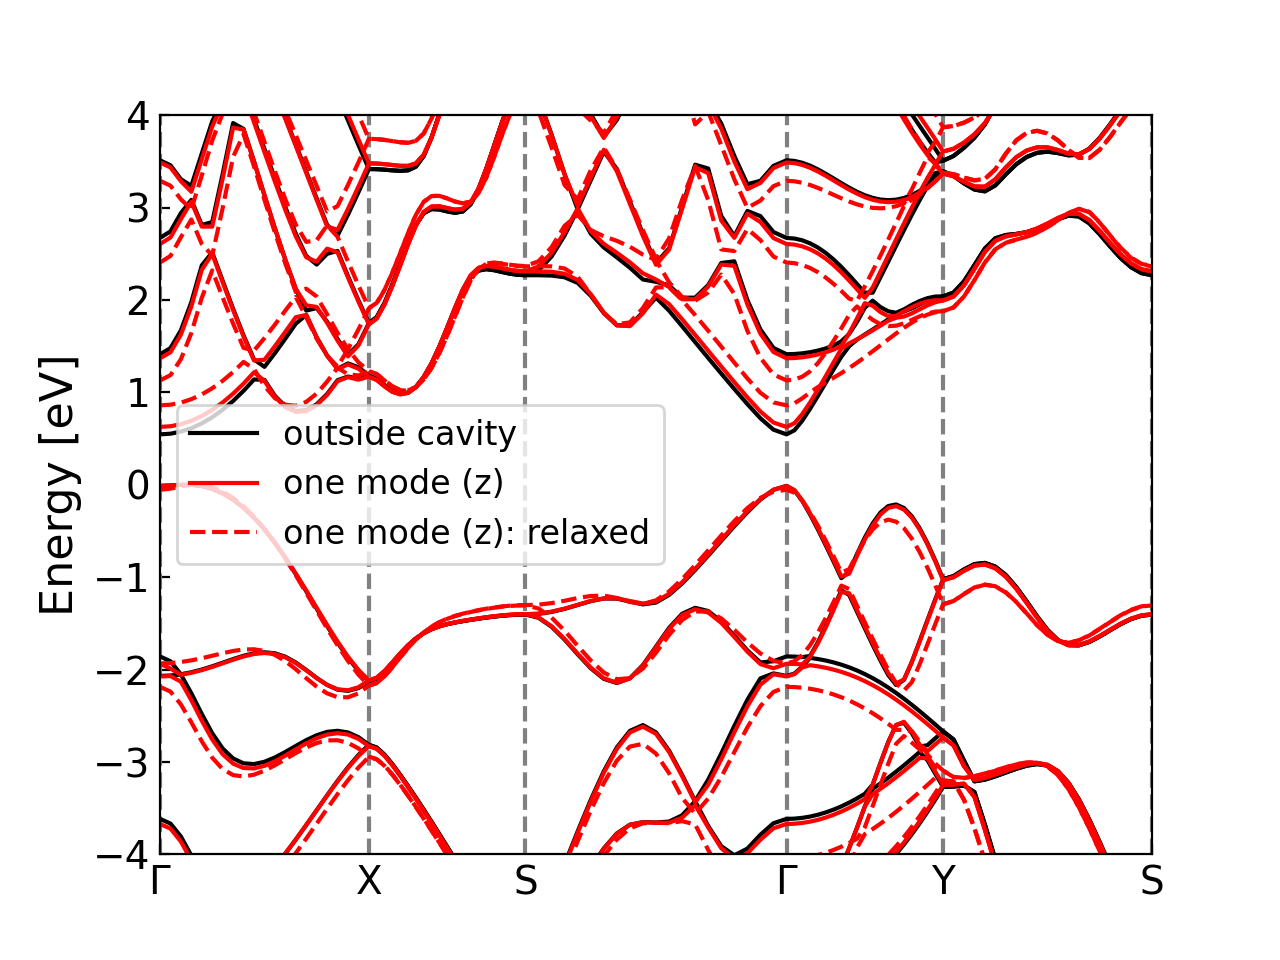

In [2]:
# Here we plot and compare the band structures  
%matplotlib notebook

ts = 14
ls = 16
lgs = 12

for i in K_SLICE:
    plt.axvline(band_data_nophoton[i,0], linestyle='--', color='gray')

for i in range(NBND):
    if i == 0: 
        plt.plot(band_data_nophoton[:,0], band_data_nophoton[:,4+i]-E_HOMO_NOPHOTON, 'k-', label='outside cavity')
    else:
        plt.plot(band_data_nophoton[:,0], band_data_nophoton[:,4+i]-E_HOMO_NOPHOTON, 'k-')

for i in range(NBND):
    if i == 0: 
        plt.plot(band_data_onemode[:,0], band_data_onemode[:,4+i]-E_HOMO_ONEMODE, 'r-', label='one mode (z)')
    else:
        plt.plot(band_data_onemode[:,0], band_data_onemode[:,4+i]-E_HOMO_ONEMODE, 'r-')

for i in range(NBND):
    if i == 0: 
        plt.plot(band_data_onemode_relax[:,0], band_data_onemode_relax[:,4+i]-E_HOMO_ONEMODE_RELAX, 'r--', label='one mode (z): relaxed')
    else:
        plt.plot(band_data_onemode_relax[:,0], band_data_onemode_relax[:,4+i]-E_HOMO_ONEMODE_RELAX, 'r--')

plt.tick_params(which='both', direction='in',labelsize=ts)
plt.xticks(band_data_nophoton[K_SLICE,0],K_LABEL)

plt.xlim([0,1.0])
plt.ylim(E_MIN,E_MAX)

plt.ylabel("Energy [eV]", size=ls)

plt.legend(prop={'size':lgs})

### Explore one-electron cases (still in progress)

Put the related variables here

If one would like to test the electron-photon calculations for only one-electron systems, `XCPhotonIncludeHartree` to turn off all the electron-electron interactions. 

The variable `PhotonXCLDAKappa` is the scaling factor for px-LDA functional. 